In [175]:
import numpy as np
import tensorflow as tf
import pandas as pd
from keras.utils import to_categorical
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import keras.backend as K


In [176]:
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.initializers import glorot_uniform
import scipy.misc
from keras.utils import to_categorical
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import PIL.Image
import skimage
import tensorflow as tf
import keras.backend as K
from keras.utils import to_categorical
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

In [177]:
#loadata 
train=pd.read_excel('D:/Program Scripts/Machine Learning/datasets/MNIST Sign/sign_mnist_train.xlsx',sheetname="sign_mnist_train")
train_label=train['label']
train=train.drop('label',1)
train=(np.array(train))
test=pd.read_excel('D:/Program Scripts/Machine Learning/datasets/MNIST Sign/sign_mnist_test.xlsx',sheetname="sign_mnist_test")
test_label=test['label']
test=test.drop('label',1)
test=(np.array(test))


In [178]:
#one hot encoding of labels
def one_hot(labels):
    labels=pd.Series(labels)
    labels=pd.get_dummies(labels)
    return np.array(labels)

In [179]:
#Shapeing 1d vec to image matrix
def remodel(vec):
    mat=[]
    for i in range(0,len(vec)):
        mat.append((vec[0]).reshape(28,28,1))
    return np.array(mat)
        
    

In [180]:
train_data,test_data,train_labels,test_labels=remodel(train),remodel(test),one_hot(train_label),one_hot(test_label)

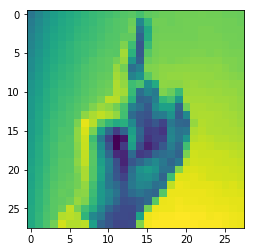

In [181]:
plt.imshow(train_data[0].reshape(28,28))#checking data 

In [182]:
def custom_net(input_shape):# Custom Model
    X_input = Input(input_shape)
    X = Conv2D(5, (3,3), strides = (5, 5), name = 'conv1')(X_input)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2),strides=(2,2),name='max_pool1')(X)
    X = Conv2D(10, (1,1), strides = (2, 2), name = 'conv2')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2),strides=(1,1),name='max_pool2')(X)
    X = Flatten()(X)
    X = Dense(24, activation='sigmoid', name='fc')(X)
    model = Model(inputs=X_input,outputs=X,name="custom_net")
    return model
    
    

In [183]:
cModel=custom_net(train_data.shape[1:])

In [184]:
cModel.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

In [185]:
print(train_data.shape)

(27455, 28, 28, 1)


In [186]:
cModel.fit(x=train_data,y=train_labels,epochs=10)

Epoch 1/10
27455/27455 [==============================] - 4s 154us/step - loss: 9.7642 - acc: 0.3852
Epoch 2/10
27455/27455 [==============================] - 4s 133us/step - loss: 9.7638 - acc: 0.3852
Epoch 3/10
27455/27455 [==============================] - 4s 136us/step - loss: 9.7637 - acc: 0.3852
Epoch 4/10
27455/27455 [==============================] - 4s 136us/step - loss: 7.5432 - acc: 0.5052
Epoch 5/10
27455/27455 [==============================] - 4s 136us/step - loss: 0.1758 - acc: 0.9583
Epoch 6/10
27455/27455 [==============================] - 4s 137us/step - loss: 0.1735 - acc: 0.9583
Epoch 7/10
27455/27455 [==============================] - 4s 137us/step - loss: 0.1736 - acc: 0.9583
Epoch 8/10
27455/27455 [==============================] - 4s 137us/step - loss: 0.1736 - acc: 0.9583
Epoch 9/10
27455/27455 [==============================] - 4s 137us/step - loss: 0.1737 - acc: 0.9583
Epoch 10/10
27455/27455 [==============================] - 4s 139us/step - loss: 0.1737 - a

In [187]:
preds = cModel.evaluate(x=test_data,y=test_labels)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

7172/7172 [==============================] - 1s 85us/step

Loss = 0.2046020263842345
Test Accuracy = 0.9583333134651184
